# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**

1. Approximately more than 40 % of the values will have starting first digit of 1 as in real life data as values such as 1 and between 100,199,1000-1999, 10,000-19,999 are much more common. However, the values starting with first digit as 9 will have lower percentage approximately less than 10% as although 9,90-99,900-999 are common but the maximum values in the range 9000-9999, 90,000-99,999 are less common

2. I think that both 1 and 9 have equal percentage of around 10% as digits 0-9 have eqaul chance of occuring as the last digit.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [1]:
# ENTER YOUR CODE HERE.
import pandas as pd
df = pd.read_csv("sp500.csv")
df.head()

,date,Name,open,close,volume
0,2018-02-01,AAL,$54.00,$53.88,3623078
1,2018-02-01,AAPL,$167.16,$167.78,47230787
2,2018-02-01,AAP,$116.24,$117.29,760629
3,2018-02-01,ABBV,$112.24,$116.34,9943452
4,2018-02-01,ABC,$97.74,$99.29,2786798


Setting Name as the index

In [2]:
df_by_Name = df.set_index("Name")
print(df_by_Name)

            date     open    close    volume
Name                                        
AAL   2018-02-01   $54.00   $53.88   3623078
AAPL  2018-02-01  $167.16  $167.78  47230787
AAP   2018-02-01  $116.24  $117.29    760629
ABBV  2018-02-01  $112.24  $116.34   9943452
ABC   2018-02-01   $97.74   $99.29   2786798
...          ...      ...      ...       ...
XYL   2018-02-01   $72.50   $74.84   1817612
YUM   2018-02-01   $84.24   $83.98   1685275
ZBH   2018-02-01  $126.35  $128.19   1756300
ZION  2018-02-01   $53.79   $54.98   3542047
ZTS   2018-02-01   $76.84   $77.82   2982259

[505 rows x 4 columns]


**ENTER YOUR WRITTEN EXPLANATION HERE.**

Using 'Name' as the index as the values are unique which makes it easier to search and sort(like a primary key).Selecting date, open,close and volume as index doesnt work as they can have same,multiple overlapping values which will make it difficult.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

In [3]:
# ENTER YOUR CODE HERE.
df.volume = df.volume.apply(str)


first_digit_volume = df.volume.str[0]
print(first_digit_volume)
import matplotlib 
%matplotlib inline

0      3
1      4
2      7
3      9
4      2
      ..
500    1
501    1
502    1
503    3
504    2
Name: volume, Length: 505, dtype: object


<Axes: xlabel='volume'>

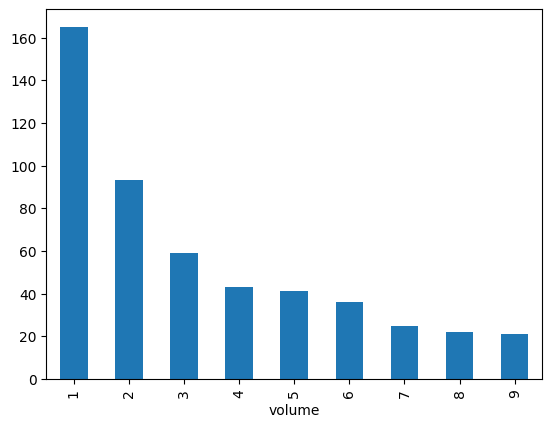

In [4]:
df_first = first_digit_volume.value_counts()
df_first.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

From the bar plot above, you can see that the predictions I made earlier in Question-0 regarding values starting with digit 1 is more frequent than values starting with digit 9 is correct.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

In [5]:
# ENTER YOUR CODE HERE.
last_digit_volume = df.volume.str[-1]
df_last = last_digit_volume.value_counts()
df_last.head()


volume
8    56
2    56
9    53
1    53
7    52
Name: count, dtype: int64

<Axes: xlabel='volume'>

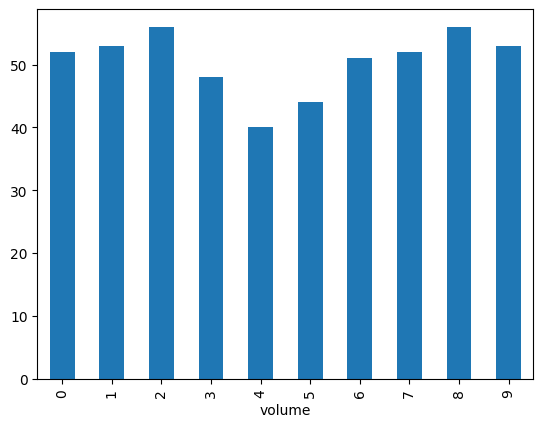

In [6]:
df_last = df_last.sort_index()
df_last.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

From the plot above, we can see that the prdiction I made in Question 0 is indeed true(Both digits 1,9 have same percentage/probability of appearing as last digit)

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [7]:
# ENTER YOUR CODE HERE.
df_close = df.close.apply(str)
first_digit_close = df.close.str[1]
print(first_digit_close)

0      5
1      1
2      1
3      1
4      9
      ..
500    7
501    8
502    1
503    5
504    7
Name: close, Length: 505, dtype: object


<Axes: xlabel='close'>

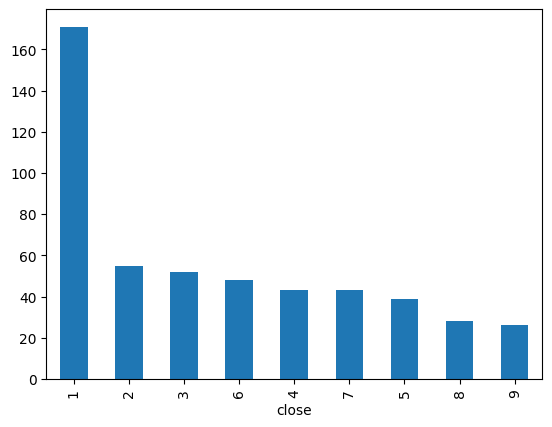

In [8]:
df_first_close = first_digit_close.value_counts()
df_first_close.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

Even in the case of using close, we can see that the percentage of having 1 as first digit is still very high than having 9 as first digit. Thus the prediction made in Question 0 still stands.
ALso, pandas infered it as dtype: object rather than int64(numric) as close contains '$' in the start position 0 . Therefore we index the string from position 1.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. This quarter, you don't need to demo Lab 1. The first lab to demo will be Lab 2.

2. Upload your .ipyn Notebook to Canvas and pdf to Gradescope.